## Robo-Advisor 14
### Strategy Chosen: SAFE

# Introduction
Welcome to Team 14's submission to the CFM 101 Group Assignment - Robo-advising. We are attempting to make a portfolio that is as safe as possible, and we will explain how we plan to achieve that throughout the project.

Note: When inputted stock list had 40 elements, the runtime of this program was: **34.93** seconds.

# Setup
The initial step in creating our portfolio is ensuring that we are working with a valid collection of tickers and their data. To do this, we first need to import the required modules and read the list of tickers from a CSV file. Then, after filtering out the valid tickers, we can extract key data related to those tickers, namely daily percentage returns, market cap, and beta.

In [1]:
# Import necessary libraries
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Read tickers csv and store in DataFrame
tickers = pd.read_csv("Tickers.csv")
# Correct DataFrame format
tickers.loc[len(tickers)] = tickers.columns[0]
tickers.rename(columns={tickers.columns[0]: 'tickers'}, inplace=True)

In [3]:
# Create a function to determine if a ticker is valid,
# according to assignment requirements
def valid_ticker(ticker):
    Ticker = yf.Ticker(ticker)
    currency = Ticker.fast_info['currency']
    history = Ticker.history(start="2023-01-01", end="2023-10-31")
    average_volume = average_monthly_volume(history, len(history))
    return (currency=='USD' or currency=='CAD') and average_volume >= 150000 and pd.notna(Ticker.history(start="2023-11-24").Close[0])

In [4]:
# Create a function to calculate average monthly volume over a given period,
# According to assignment requirements
def average_monthly_volume(pd, size):
  # Initiate a list to store monthly averages
  monthly_volumes = []
  # Initiate a variable to go through the DataFrame's index
  i = 0
  # Count the number of months to be averaged
  months = 1
  # Loop through each row in the DataFrame
  while i < size:
    # Count the number of days in the month
    days = 0
    total = 0
    for j in range(i, size):
      # Add daily averages and increment days if the month is correct
      if pd.index[j].month == months:
        total += pd.Volume[j]
        days += 1
    # Only add the month's result if it had more than 18 trading days
    if days >= 18: monthly_volumes.append(total)
    i += days
    months += 1
  # Return the average monthly volume
  return np.mean(monthly_volumes)

In [5]:
# Initiate a list to store valid tickers
valid_tickers=[]
# Loop through tickers from the csv file
for index, row in tickers.iterrows():
  # Attempt to check the ticker's validity. If valid, add it to valid tickers
  try:
    if valid_ticker(row['tickers']):
        valid_tickers.append(row['tickers'])
  # If an error occurs, the ticker is likely missing data or does not exist
  except:continue

In [6]:
# Dynamically set start and end date to suit our needs
start_date = "2023-10-25"
end_date = "2023-11-25"
# Initiate DataFrames for each metric we will be using
closing_data = pd.DataFrame()
beta_data = pd.DataFrame()
market_cap_data = pd.DataFrame()
cadusd = yf.Ticker("CADUSD=x").history(start=end_date).Close[-1]
# Loop through valid tickers and add information to the appropriate DataFrame
for ticker in valid_tickers:
    Ticker = yf.Ticker(ticker)
    info = Ticker.info
    closing_data[ticker] = Ticker.history(start=start_date,end=end_date).Close.pct_change()
    beta_data[ticker] = [info['beta']]
    market_cap_data[ticker] = [info['marketCap']*cadusd] if info['currency'] == 'CAD' else [info['marketCap']]
closing_data = closing_data.iloc[1:]

In [7]:
# Initiate DataFrame to store metric values to be used in analysis
metric_values = pd.DataFrame(index=['beta', 'market cap', 'range of %returns', 'std', 'mean of %returns'])
for ticker in valid_tickers:
    # Initiate an empty list of metrics and add values in order
    metrics = []
    metrics.append(beta_data[ticker][0])
    metrics.append(market_cap_data[ticker][0])
    closing_metrics = closing_data[ticker]
    metrics.append(abs((closing_metrics.max()-closing_metrics.min())))
    metrics.append(closing_metrics.std())
    metrics.append(abs(closing_metrics.mean()))
    metric_values[ticker] = metrics

# Display the first five rows of the DataFrame
metric_values.head()

,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,BK,...,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB,AAPL
beta,4.770000e-01,6.800000e-01,1.219000e+00,1.049000e+00,1.175000e+00,1.206000e+00,1.478000e+00,1.389000e+00,9.600000e-02,1.078000e+00,...,7.920000e-01,2.079000e+00,6.820000e-01,8.620000e-01,1.001000e+00,6.370000e-01,1.107000e+00,1.103000e+00,1.042000e+00,1.305000e+00
market cap,2.448274e+11,1.785885e+11,2.098172e+11,4.578003e+10,1.516411e+12,1.198204e+11,1.330949e+11,2.352752e+11,3.360909e+10,3.641561e+10,...,1.217318e+11,9.075903e+10,2.567459e+10,1.112073e+11,1.394910e+11,5.060264e+11,1.367206e+11,1.295183e+11,5.792077e+10,2.954566e+12
range of %returns,6.448759e-02,3.562188e-02,3.757998e-02,5.892075e-02,8.616085e-02,4.420657e-02,5.724801e-02,9.124422e-02,8.826373e-02,3.641919e-02,...,4.742282e-02,2.496182e-01,5.251920e-02,4.608713e-02,4.708878e-02,2.026471e-02,4.455923e-02,9.553511e-02,1.134087e-01,4.782558e-02
std,1.313536e-02,1.001349e-02,9.937384e-03,1.311672e-02,2.054966e-02,1.097974e-02,1.424089e-02,2.075509e-02,1.937204e-02,1.115882e-02,...,9.900916e-03,4.901377e-02,1.281112e-02,9.938115e-03,1.474524e-02,6.467768e-03,1.042509e-02,2.021221e-02,2.638763e-02,1.144788e-02
mean of %returns,2.124904e-03,4.569935e-03,6.360992e-03,3.295728e-03,9.268604e-03,6.551756e-03,1.030671e-02,7.443836e-03,2.753792e-03,6.439205e-03,...,4.295258e-03,1.872247e-02,3.763723e-03,3.997644e-03,4.353024e-03,1.514278e-03,4.289505e-03,2.378763e-03,8.595845e-03,5.119627e-03


# Stock Analysis
Our overarching strategy for choosing stocks is centered on calculating a "safety index" for each stock that was between 0 and 100 (Note the Adjusted Safety Index (see below) was unbounded on the positive side, but typically hovered between 50 to 110). The index will depend on what we think are 5 of most useful metrics for measuring safety. In particular, we will be considering the beta and market cap, as well as the range, standard deviation, and mean of percentage returns. This allows us to obtain a clear idea of which stocks are the safest and which stocks we should avoid.

We will give a short description of each metric and how we plan to use it, coupled with a graph to illustrate some of the reasoning behind why we chose that metric.

To minimize redundancy, we created the function below to visualize the effectiveness of any metric:


In [8]:
def compare_metrics(metric, metrics, returns):
    # Retrieve stocks that have the highest and lowest values for that metric
    minimum = metrics.idxmin(axis=1)[metric]
    maximum = metrics.idxmax(axis=1)[metric]

    # Plot daily percentage returns for both stocks
    plt.plot(returns[minimum],label=f"lowest {metric} ({minimum})")
    plt.plot(returns[maximum],label=f"highest {metric} ({maximum})")

    # Add title
    plt.title(f"Comparison between highest and lowest {metric}")
    # Add horizontal line at y=0 for reference
    plt.axhline(y=0, color='r', linestyle = '-')
    # Place legend at best possible location
    plt.legend(loc='best')
    # Rotate x-axis labels to be more readable
    plt.xticks(rotation=30)

    # Display graph
    plt.show()

### Metrics

1. *Beta value*: The beta value is a measure of how a stock moves relative to the rest of the market. The closer a stock's beta is to zero, the less the stock's movements correlate with the market, so a stock with a beta close to zero would be a good choice to mitigate systematic or market risk. Moreover, a stock with a negative beta means that it changes in opposite directions to the market, making it a good choice to actively combat systematic risk. Thus, we are choosing to favour **lower** beta values, with extra emphasis on negative beta stocks. We can see from a graph of daily percentage returns for the stock with the lowest beta and the stock with the highest beta that there must be some correlation between low beta and safety.

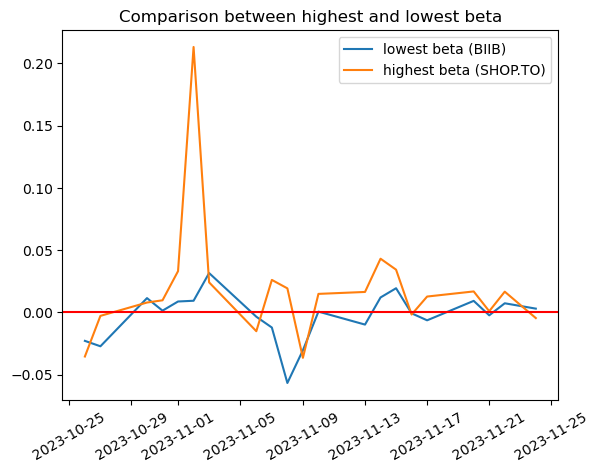

In [9]:
compare_metrics('beta', metric_values, closing_data)

2. *Market cap*: The market cap of a stock indicates its overall worth on the open market, an important factor because it demonstrates how large and well-established a company is. Bigger companies tend to be less susceptible to flash market changes than small companies are. Thus, we are choosing to favour **higher** market caps. For instance, take the following graph of the stocks with the lowest and highest market cap. It illustrates that choosing high market caps is a somewhat effective way of ensuring safety, but it can have certain pitfalls as discussed later on in the weightage section.

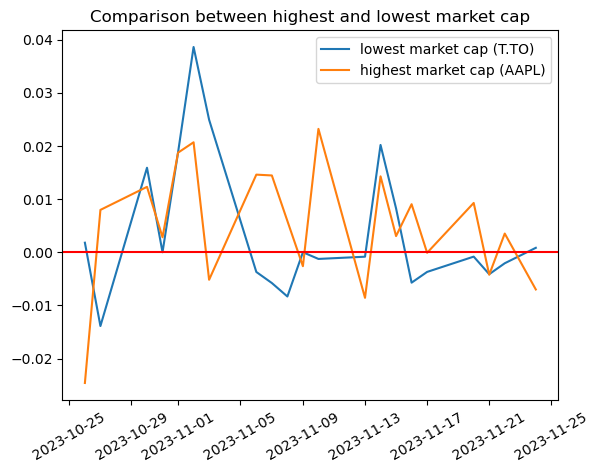

In [10]:
compare_metrics('market cap', metric_values, closing_data)

3. *Range of percent return*: This measures the difference between the highest and lowest value of a stock’s daily return, thereby providing an estimate of how much the price of a stock could possibly change in a given period of time. The lower the range, the less likely it is for a stock to have great fluctuations in price. Thus we are choosing to favour **lower** ranges of percent return. We can see from a graph of daily percentage returns for the stock with the lowest range and the stock with the highest range that there must be some correlation between a low range and safety.

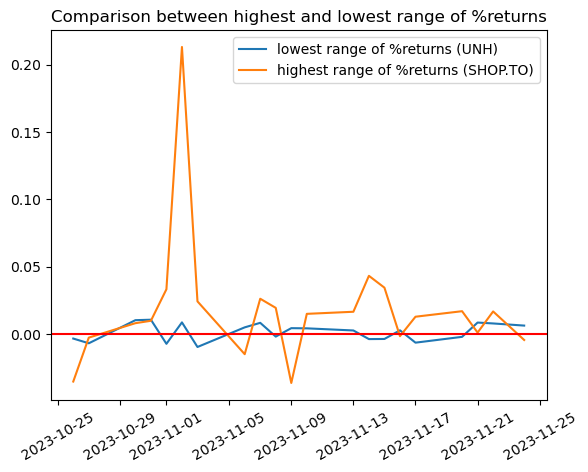

In [11]:
compare_metrics('range of %returns', metric_values, closing_data)

4. *Standard deviation*: This is the statistical measure of the spread of a stock's daily close prices relative to their average, and in terms of safety, the lower the price spreads the more stable it is, and thus we are choosing to favour **lower** standard deviations. We can see from a graph of daily percentage returns for the stock with the lowest standard deviation and the stock with the highest standard deviation that there must be some correlation between a low standard deviation and safety.

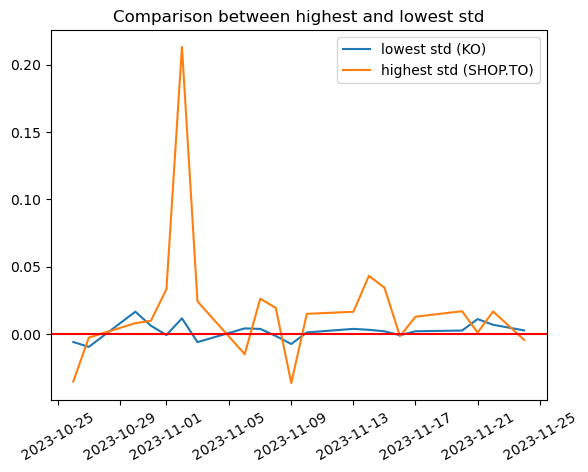

In [12]:
compare_metrics('std', metric_values, closing_data)

5. *Average daily return*: This is a measure of how high the average daily return is, and for our purposes, the closer this value is to zero, the less the stock value changes over time so we are choosing to favour **lower average daily returns**. While this is a good measure, it doesn’t always account for certain cases such as when a stock’s price fluctuates greatly but still ends up with an average percent return of zero. This is why we are coupling this measurement with standard deviation, since such a stock would have a high standard deviation and therefore be unfavourable to us. Additionally, we can see from a graph of daily percentage returns for the stock with the lowest average return and the stock with the highest average return that there must be some correlation between a low average return and safety.

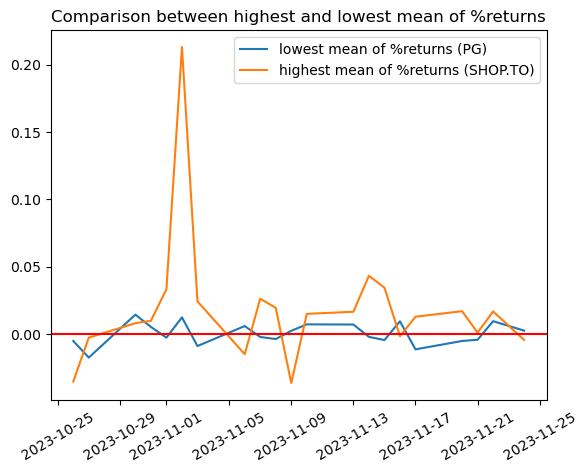

In [13]:
compare_metrics('mean of %returns', metric_values, closing_data)


### Weightage
Not all of the metrics discussed above have the same influence in determining what constitutes a “safe” stock. Therefore, we felt it made more sense to add a weightage of importance to each metric that could be added together to create a comprehensive safety index. These weightages and their reasonings are listed below:

1. Beta at **30%**:  The beta of a stock is very useful in indicating its movement relative to the rest of the market, but it doesn't encapsulate how stable the stock is by itself in the sense that the standard deviation does. Since historically and logically the beta is usually inversely proportional to its overall stability, we decided to give it 30% of weightage in our overall safety index to reflect this.
2. Market cap at **10%**: Since market cap is a good indicator of a company’s health, it doesn't provide much information about how the stock itself moves relative to the market or individually. In addition, large firms are generally resistant to non-systematic risk, but could still be negatively influenced by changes in the market. Therefore, we felt it made sense to include the measurement but give it a lower weightage of 10%
3. Range of percent return at **15%**: While this is a good objective measure of the singular value that is the range of daily returns, it doesn't give as much manipulable information as standard deviation, and is less descriptive as well. However, it is equally as important as the average daily return, so we gave it a weightage of 15%.
4. Standard deviation at **30%**. Since this is a great indicator of the spread of the closing prices over a historical timeframe, it gives us useful information about the stability of a stock over a time period. However, it only gives information about the individual stock and does not provide a bigger picture analysis of the stocks movements in regards to other factors, which the beta does. This means it works synonymously with the beta to give the best image of the stock spread, and so we have given it an equivalent value of 30%.
5.   Average daily return at **15%**: As mentioned earlier, a shortcoming of this metric is that it does not account for extremely volatile stocks that cancel out their own movements, however it is a good indicator of a stock that changes very little between the start and end of the day. It works synonymously with the range of percent return, and so we have given it an equivalent weightage of 15%

### Calculating Safety Index

The two primary methods we thought of to calculate the safety index of each stock were raw values and the relative rankings. Both have arguments for and against them, so we decided to use a mixture of both.

Multiplying our weightages with raw values first and foremost becomes difficult since there is no singular normalized data range. For example, market cap has a high potential for variability between stocks as it can differ by multiple orders of magnitude, while mean percentage returns generally lie within a small boundary. Taking a percentage of each value needs to be done in relation to a benchmark, and using the maximum or minimum value for the benchmark of each percentage becomes unreliable if there exist extreme outliers, such as AAPL’s market cap which is in the trillions. That said, the raw value can still give a relatively accurate benchmark for things like the range of percent return, standard deviation and average daily return, since ideally, these values are somewhat bounded. This is why we have still incorporated raw values into the weightage of the aforementioned three metrics.

The other method is ranking each stock based on its metric value and using this rank to determine its favourability. For example, when the stocks are ranked in descending order based on their beta value, the most favourable stock would have the lowest beta and thus the highest rank. Multiplying our weightages with rankings is, in the bigger picture, beneficial, since it directly compares the value of each metric to its relative competition. This means that the higher or lower the ranking is, depending on which extrema we set as our goal, leads to a better weightage overall. The problem occurs when we want to consider outlier values, since a stock with an absurdly high standard deviation might only be capped to being the lowest in a range, where we would want it to reflect a value that is more accurate and gives more negative weightage to the stock’s safety index makeup.

For the above reasons, we have decided that for the two metrics beta and market cap, where we want to avoid the impacts of outlier values, and the less than elegant results that they return, that we will only use their relative rankings to each other. However, for the three other metrics, our safety index is much more accurately reflected when half of the desired weightage is contributed to by the ranking, and half by the raw value.

Once all of these contributions are calculated, we can simply sum them up to achieve the stock's safety index.

After testing many different metrics, weightages, and ranking/raw-value splits with the Tickers_Example.csv, we have come to the final conclusion that the overall algorithm produces the most accurate values when the above stipulations are placed on it.

In [14]:
# Define the weightages for each metric
weightages = [30, 10, 15, 30, 15]

# Create a new DataFrame to store the weightages
weightage_data = pd.DataFrame(index=['beta', 'market cap', 'range of %returns', 'std', 'mean of %returns'])

# Rank all metrics
beta_rank = metric_values.loc['beta'].rank(ascending=False)
market_cap_rank = metric_values.loc['market cap'].rank(ascending=True)
range_rank = metric_values.loc['range of %returns'].rank(ascending=False)
std_rank = metric_values.loc['std'].rank(ascending=False)
mean_rank = metric_values.loc['mean of %returns'].rank(ascending=False)

# Create a new DataFrame to store the safety index
safety_index_data = pd.DataFrame(index=['Raw Safety Index'])

# Loop through each stock for all metrics
for ticker in metric_values.columns:
    # Calculate the weightage for each metric based on rank
    beta_weightage_rank = beta_rank[ticker] / beta_rank.max() * weightages[0]
    market_cap_weightage_rank = market_cap_rank[ticker] / market_cap_rank.max() * weightages[1]
    range_weightage_rank = range_rank[ticker] / range_rank.max() * weightages[2]
    std_weightage_rank = std_rank[ticker] / std_rank.max() * weightages[3]
    mean_weightage_rank = mean_rank[ticker] / mean_rank.max() * weightages[4]

    # Calculate the weightage for each metric based on raw value
    range_weightage_raw = (1-abs(metric_values.loc['range of %returns',ticker])) * weightages[2]
    std_weightage_raw = (1-abs(metric_values.loc['std',ticker])) * weightages[3]
    mean_weightage_raw = (1-abs(metric_values.loc['mean of %returns',ticker])) * weightages[4]

    # Store the individual weightages in the DataFrame
    weightage_data.loc['beta', ticker] = beta_weightage_rank
    weightage_data.loc['market cap', ticker] = market_cap_weightage_rank
    weightage_data.loc['range of %returns', ticker] = (range_weightage_rank + range_weightage_raw) / 2
    weightage_data.loc['std', ticker] = (std_weightage_rank + std_weightage_raw) / 2
    weightage_data.loc['mean of %returns', ticker] = (mean_weightage_rank + mean_weightage_raw) / 2

    # Calculate the total safety index
    total_safety_index = sum([weightage_data.loc['beta', ticker], weightage_data.loc['market cap', ticker], weightage_data.loc['range of %returns', ticker], weightage_data.loc['std', ticker], weightage_data.loc['mean of %returns', ticker]])

    # Add the total safety index to the safety index DataFrame
    safety_index_data[ticker] = [total_safety_index]

# Append the safety index DataFrame to the weightage DataFrame
weightage_data = pd.concat([weightage_data, safety_index_data])

# Display the DataFrame
weightage_data


,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,BK,...,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB,AAPL
beta,25.000000,20.000000,7.500000,13.333333,9.166667,8.333333,2.500000,3.333333,30.000000,12.083333,...,17.500000,0.833333,19.166667,15.833333,15.000000,20.833333,10.000000,10.833333,14.166667,5.000000
market cap,8.055556,6.944444,7.222222,1.111111,9.722222,4.166667,5.277778,7.777778,0.555556,0.833333,...,4.444444,2.777778,0.277778,3.611111,5.833333,9.166667,5.555556,5.000000,1.388889,10.000000
range of %returns,10.349676,13.691169,13.259817,10.599761,9.145460,13.001784,10.820640,8.690668,8.921355,13.476856,...,11.519329,5.836197,11.064439,12.362680,11.730168,14.848015,12.582472,8.033487,7.066101,11.307975
std,22.302970,26.099798,27.350939,22.719916,18.025088,24.418637,21.869720,17.605340,19.292753,23.999284,...,27.768153,14.681460,23.141167,26.934262,21.445488,29.486317,25.260290,18.863483,15.437519,23.578282
mean of %returns,12.900730,10.382392,9.743959,11.850282,8.263819,9.325862,7.839366,9.110838,12.062680,9.535039,...,10.801119,7.567915,11.638439,11.428351,10.592352,13.738643,11.009495,12.482159,8.685531,10.169936
Raw Safety Index,78.608931,77.117803,65.076937,59.614403,54.323256,59.246283,48.307504,46.517958,70.832344,59.927846,...,72.033045,31.696683,65.288489,70.169737,64.601341,88.072974,64.407814,55.212463,46.744707,60.056193


In [15]:
# Sort stocks in decreasing order of safety index, so that the "safest" stocks appear first
safety_index_data.sort_values(by='Raw Safety Index', axis=1, ascending=False, inplace=True)

At this point, we have obtained a ranking for our stocks from safest to riskiest, as per our calculations. We are now ready to move on to the next phase of our strategy, but before we do that, let us perform some graphical analyses to check if what we have so far is reasonable:

First, we will graph the daily percentage returns, in the past month, of what we determined to be the safest and riskiest stocks. Hopefully, by comparing stocks on two ends of the spectrum you are able to see how well we have separated safe stocks from risky ones:

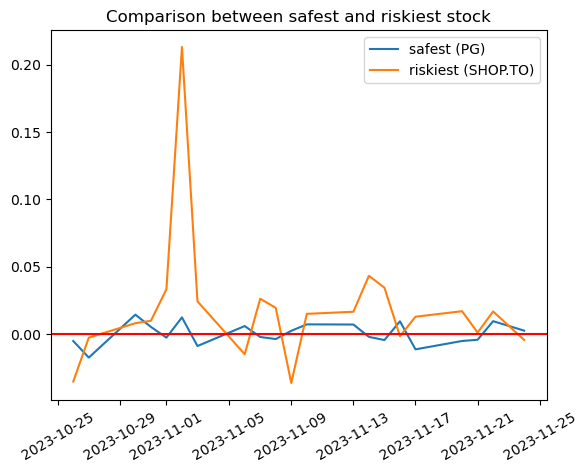

In [16]:
# Get tickers of safest and riskiest stocks
safest_ticker = safety_index_data.columns[0]
riskiest_ticker = safety_index_data.columns[-1]

# Plot daily percentage returns for both stocks
plt.plot(closing_data[safest_ticker],label=f"safest ({safest_ticker})")
plt.plot(closing_data[riskiest_ticker],label=f"riskiest ({riskiest_ticker})")

# Add title
plt.title("Comparison between safest and riskiest stock")
# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle = '-')
# Place legend at best possible location
plt.legend(loc='best')
#Rotate x-axis labels to be more readable
plt.xticks(rotation=30)

# Display graph
plt.show()

# Safety Index Optimization
The final stage of our strategy involves diversifying our portfolio with regards to correlation, country, and industry. Now that we have constructed basic safety indices for each stock, we can dynamically adjust them based on the factors mentioned above.

For example, if a stock has a negative correlation in its returns with respect to the rest of the portfolio, we would favour that stock by increasing its safety index by a certain amount. Such stocks are desirable because they are capable of partially correcting movements in the portfolio, thus making it safer.

Also, if the country of a particular stock is underrepresented in the portfolio, then we would favour that stock by increasing its safety index. Doing so will lessen the severity of political risk and other country-related risks. The same reasoning applies to industries - favouring underrepresented industries can mitigate industry-specific risk.

In [17]:
# converts American stock prices to Canadian Dollars
def convert_to_cad(prices, stockname):
    usdcad = yf.Ticker('USDCAD=x')
    end_date = (pd.to_datetime(prices.index[-1]) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    # returns exchange rates that align with stock dates
    usd_to_cad = pd.DataFrame(usdcad.history(start=prices.index[0], end=end_date))['Close']
    usd_to_cad.index = usd_to_cad.index.strftime('%Y-%m-%d')
    # converts USD to CAD
    converted = pd.DataFrame(index=prices.index)
    converted[stockname] = prices * usd_to_cad
    return converted

# gets the last seven days of closing price history for a list of stocks
def get_seven_day_history(list_of_stocks):
    history_week_price = pd.DataFrame()
    for stock in list_of_stocks:
        ticker = yf.Ticker(stock)
        # starting one week ago from the submission date (November 25th)
        history = ticker.history(start='2023-11-18', end='2023-11-25')['Close']
        history.index = history.index.strftime('%Y-%m-%d')
        # if the stock is american, then convert from USD to CAD
        if (ticker.info['country'] == 'United States'):
            history = convert_to_cad(history, stock)
        else:
            history = history.rename(stock)
        history_week_price = pd.concat([history_week_price, history], axis=1)
    return history_week_price

In [18]:
# gets the country and sector for a list of stocks and puts that data into a dataframe
def get_dynamic_indicators(list_of_stocks):
    dynamic_indicators = pd.DataFrame()
    for stock in list_of_stocks:
        ticker = yf.Ticker(stock)
        # retrives country and sector
        country = ticker.info['country']
        industry = ticker.info['sector']
        dynamic_indicators[stock] = [country, industry]
    dynamic_indicators = dynamic_indicators.rename(index={0: 'Country', 1: 'Sector'})
    return dynamic_indicators

In [19]:
# accepts a dataframe with stock prices (all in CAD), and then outputs an equally weighted portfolio totalling $750,000 CAD
def get_current_portfolio(raw_price_df):
    portfolio = raw_price_df.copy()
    portfolio_value = 750000
    number_of_stocks = len(raw_price_df.columns)
    # since this portfolio is equally weighted, the shares purchased of each stock should amount to the same value (totalling $750,000 CAD)
    money_invested_per_stock = portfolio_value/number_of_stocks
    for i in range (number_of_stocks):
        # calculates the number of shares purchased
        shares_purchased = money_invested_per_stock/portfolio.iloc[0, i]
        column_label = portfolio.columns[i]
        # creates the portfolio with individual stock values
        portfolio[column_label] = portfolio[column_label] * shares_purchased
    # sums the portfolio up to track the 7 day performance of the overall portfolio
    portfolio['Portfolio Total'] = portfolio.sum(axis=1)
    portfolio = portfolio[['Portfolio Total']]
    return portfolio

### Correlation

Correlation was a significant factor in determining the adjusted safety index value of each stock. It was calculated by determining the Pearson Correlation Coefficient, which produces values between -1 and 1. The data used was the 7 day historical closing prices of each stock, post-filtering, and the 7 day historical closing prices of the current final portfolio (that is, every time a new stock was added to the final portfolio, this value was recalculated.)

Since negative correlation coefficients suggest that a given stock in our potential list of stocks moves in the opposite direction of the general portfolio, negative correlations were weighted significantly higher at +-25% for each stock, applied linearly with respect to the distance between the correlation coefficient and 0. In layman's terms, if a stock had a perfectly negative correlation (-1), its correlation multiplier was in turn 1.25x, and if a stock had a perfectly positive correlation (1), its correlation multiplier was in turn 0.75x.

Note: Though covariance was explored further in depth in class, we decided not to use it as its values are unbounded, which can lead to outliers in results but also makes standardizing data much harder.

In [20]:
# calculates the correlation of a stock vs. the entire portfolio using the df.corr function in pandas
def get_correlation(stock_dataframe, portfolio_dataframe):
    correlation = stock_dataframe.iloc[:,0].corr(portfolio_dataframe['Portfolio Total'])
    return correlation

# for each stock in the safety index, update the correlation multiplier such that it scales linearly, and is favoured towards negative correlated stocks (w.r.t the portfolio)
def update_correlation_values(potential_stocks_historical, portfolio_stocks_historical, potential_stocks_safety_index):
    # the maximum multiplier impact this can have on the overall score (min: 0.75, max: 1.25)
    correlation_weighting_max = 0.25
    # recalculates the overall portfolio based on the final portfolio stocklist
    portfolio = get_current_portfolio(portfolio_stocks_historical)
    # updates each stock's correlation multiple based on the stock's correlation w.r.t the portfolio
    for i, stockname in enumerate(potential_stocks_safety_index.columns):
        correlation_value = get_correlation(potential_stocks_historical[[stockname]], portfolio)
        # linearly scaling multiple
        correlation_muliple = 1 + (-correlation_value)*correlation_weighting_max
        # assuming the correlation multipler is the 1st row of the safety index
        potential_stocks_safety_index.iloc[1, i] = correlation_muliple
    return potential_stocks_safety_index

### Country

From in class discussions, observations, and assignments, it is evident that portfolios that have stocks that originate from different countries are more diversified and are able to hedge risk, given that different countries have different markets that move in different ways.

Thus, our team implemented a country multiplier, which adds a fixed 1.1x multiplier to any stock whose country is underrepresented in the overall portfolio. Since the filtered portfolios only contain Canadian stocks and American stocks, the 1.1x multiplier was applied to all Canadian stocks when American stocks were overrepresented in the overall portfolio, and vise versa for American stocks.

In [21]:
# determines the % of stocks that are domestic (Canadian) in a given portfolio
# note for debugging: portfolio_stock_list must have at least 1 element
def get_portfolio_country_demographics(portfolio_stock_list, country_industry):
    domestic_stocks = 0
    total_stocks = len(portfolio_stock_list)
    for i in range (total_stocks):
        # country industry is made using get_dynamic_indicators()
        country = country_industry.loc['Country', portfolio_stock_list[i]]
        if (country == 'Canada'):
            domestic_stocks += 1
    # calculates the percent of stocks that are domestic
    percent_domestic = domestic_stocks/total_stocks
    return percent_domestic

# for each stock in the safety index, update the country multiplier such that if a country is underrepresented, all stocks from that country gain a 1.1x multiplier
def update_country_values(potential_stocks_safety_index, portfolio_stock_list, country_industry):
    percent_domestic = get_portfolio_country_demographics(portfolio_stock_list, country_industry)
    # if american stocks are underrepresented
    if percent_domestic >= 0.5:
        for i, stockname in enumerate(potential_stocks_safety_index.columns):
            country = country_industry.loc['Country', stockname]
            # if the stock originates from america, adjust the multiplier to 1.1x
            if (country != 'Canada'):
                potential_stocks_safety_index.iloc[2, i] = 1.10
    # if canadian stocks are underrepresented
    else:
        for i, stockname in enumerate(potential_stocks_safety_index.columns):
            country = country_industry.loc['Country', stockname]
            # if the stock originates from canada, adjust the multiplier to 1.1x
            if (country == 'Canada'):
                potential_stocks_safety_index.iloc[2, i] = 1.10 
    return potential_stocks_safety_index

### Sector

From in class discussions, observations, and assignments, it is evident that portfolios that have stocks ranging from a wide variety of sectors are more diversified, and therefore able to hedge risk better and reduce deviation.

Thus, our team implemented a country multiplier, which adds a fixed 1.1x multiplier to any stock whose sector is underrepresented in the overall portfolio. The methodology for calculation is explained in the code below.

In [22]:
# determines the % sector composition of the portfolio
# note for debugging: portfolio_stock_list must have at least 1 element
def get_portfolio_sector_demographics(portfolio_stock_list, country_industry):
    sector_counts = {}
    # gets sector data from country_industry dataframe (to avoid re-calling yfinance)
    for stock in portfolio_stock_list:
        sector = country_industry.loc['Sector', stock]
        sector_counts[sector] = sector_counts.get(sector, 0) + 1
    total_stocks = len(portfolio_stock_list)
    # determines the percentage weighting of each sector in the portfolio
    sector_percentages = {sector: count / total_stocks * 100 for sector, count in sector_counts.items()}
    # the ideal weighting is when all sectors are equally represented in the portfolio (since sector diversification = more stability)
    ideal_weighting = 100 / len(sector_counts)
    # determines whether a stock's sector is underrepresented, overrepresented, or balanced
    sector_status = {sector: "Underrepresented" if percentage < ideal_weighting else "Overrepresented" if percentage > ideal_weighting else "Balanced" for sector, percentage in sector_percentages.items()}
    return sector_status

# for each stock in the safety index, update the sector multiplier such that if a sector is underrepresented, all stocks from that country gain a 1.1x multiplier
def update_sector_values(potential_stocks_safety_index, portfolio_stock_list, country_industry):
    # gets data on which sectors are overrepresented, underrepresented, and balanced
    sector_statuses = get_portfolio_sector_demographics(portfolio_stock_list, country_industry)
    for i, stockname in enumerate(potential_stocks_safety_index.columns):
        sector = country_industry.loc['Sector', stockname]
        if sector in sector_statuses:
            # if the sector is underrepresented, then adjust the sector multiplier to 1.1x
            if sector_statuses[sector] == "Underrepresented":
                potential_stocks_safety_index.iloc[3, i] = 1.1
        # as well, if the portfolio does not contain a stock with the sector, adjust the sector multiplier to 1.1x
        else:
            potential_stocks_safety_index.iloc[3, i] = 1.1
    return potential_stocks_safety_index

In [23]:
# adjusts all multipliers based on the methadology listed above, and then recalculates the adjusted safety index by multiplying the multipliers by the raw safety index
def recalculate_adjusted_safety_index(potential_stocks_safety_index, potential_stocks_historical, portfolio_stocks_historical, country_industry):
    # note country industry must be defined beforehand
    potential_stocks_safety_index = update_correlation_values(potential_stocks_historical, portfolio_stocks_historical, potential_stocks_safety_index)
    potential_stocks_safety_index = update_country_values(potential_stocks_safety_index, portfolio_stocks_historical.columns, country_industry)
    potential_stocks_safety_index = update_sector_values(potential_stocks_safety_index, portfolio_stocks_historical.columns, country_industry)
    # calculate Adjusted Safety Index
    potential_stocks_safety_index.loc['Adjusted Safety Index'] = potential_stocks_safety_index.loc['Raw Safety Index'] * potential_stocks_safety_index.loc['Correlation Multiplier'] * potential_stocks_safety_index.loc['Country Multiplier'] * potential_stocks_safety_index.loc['Sector Multiplier']

    return potential_stocks_safety_index

### Generating the Final Portfolio
The methodology for generating the final portfolio was simple. After implementing constraints detailed in the assignment sheet (i.e., the final portfolio must have a minimum of 10 stocks and a maximum of 22), our team formulated a simple process for determining the most optimal combination of stocks for our portfolio:

1. Since the final portfolio does not yet contain any stocks, none of the multipliers can be calculated (since they are contingent on the stocks inside the final portfolio). Thus, add the the stock that has the highest Raw Safety Index to the final portfolio. 
2. Recalculate the Multipliers and the Adjusted Safety Index for each stock in the Safety Index Dataframe, w.r.t the current final portfolio. 
3. Sort the Safety Index Dataframe such that the stock with the highest Adjusted Safety Index is at the leftmost column. 
4. If the portfolio contains 22 stocks, stop and print the final portfolio list. 
5. If the portfolio does not contain at least 10 stocks, or if the portfolio contains 10 stocks and the stock with the highest Adjusted Safety Index is above the cutoff set (in this case, cutoff_score = 88), add the leftmost stock to the final portfolio, and remove the leftmost stock from the Safety Index Dataframe. 
6. Repeat steps 2 to 6 if all conditions have been met. Otherwise, break and print the final portfolio.

This methodology is most effective given our quantitative approach to the problem. This allows us to dynamically recalculate each of the Correlation, Country Diversity, and Sector Diversity w.r.t the current final portfolio, and only allows us to add stocks that are beneficial to our end goal, which is reducing the average change. Not only is this effective at finding safe, stable stocks, but it is extremely effective at identifying negatively correlated stocks and ensuring they are selected to be in the final portfolio. 

In [24]:
# function that determines the most optimal combination of stocks in the final portfolio, based on a mathematical safety index.
def generate_portfolio_stocks(raw_index_stocks):
    # Create new safety index dataframe with dynamic multipliers and final adjusted safety index; by default set all values to 1
    potential_stocks_safety_index = raw_index_stocks.copy()
    potential_stocks_safety_index.loc['Correlation Multiplier'] = 1
    potential_stocks_safety_index.loc['Country Multiplier'] = 1
    potential_stocks_safety_index.loc['Sector Multiplier'] = 1
    potential_stocks_safety_index.loc['Adjusted Safety Index'] = 1
    # pre-generate historical stock data (the seven day history of each stock in raw index stocks), so that yfinance is only called once
    potential_stocks_historical = get_seven_day_history(raw_index_stocks.columns)
    # create a country industry reference dataframe so that yfinance is only called once
    country_industry = get_dynamic_indicators(raw_index_stocks.columns)
    # initialize a current portfolio stocks historical, which contains the historical close prices of stocks in the final portfolio
    portfolio_stocks_historical = pd.DataFrame()

    # constants, based on the assignment specifications + the team's methodology
    cutoff_score = 88
    min_num_stocks = 10
    max_num_stocks = min(len(raw_index_stocks.columns), 22)
    stocks_in_portfolio = 0

    # actual while loop to generate portfolio
    while True:
        # since there are no stocks to compare to yet in the final portfolio, specifically define what the function should do on the first iteration
        if stocks_in_portfolio == 0:
            # manually calculate the first iteration's adjusted safety index, since the function doesn't work if final_portfolio is empty
            potential_stocks_safety_index.loc['Adjusted Safety Index'] = potential_stocks_safety_index.loc['Raw Safety Index'] * potential_stocks_safety_index.loc['Correlation Multiplier'] * potential_stocks_safety_index.loc['Country Multiplier'] * potential_stocks_safety_index.loc['Sector Multiplier']
            # sort stocks such that the highest ranked stock appears at column 0.
            potential_stocks_safety_index = potential_stocks_safety_index.T.sort_values(by='Adjusted Safety Index', ascending=False).T
            best_stock = potential_stocks_safety_index.columns[0]
            # add the best stock to the portfolio dataframe
            portfolio_stocks_historical = potential_stocks_historical[[best_stock]]
            # remove the best stock from the potential portfolio stocks dataframe
            potential_stocks_safety_index = potential_stocks_safety_index.iloc[:, 1:]
            stocks_in_portfolio += 1
            continue
        # recalculates the multipliers and safety indicies of each stock in potential stocklist, w.r.t the final portfolio
        potential_stocks_safety_index = recalculate_adjusted_safety_index(potential_stocks_safety_index, potential_stocks_historical, portfolio_stocks_historical, country_industry)
        # sort stocks such that the highest ranked stock appears at column 0.
        potential_stocks_safety_index = potential_stocks_safety_index.T.sort_values(by='Adjusted Safety Index', ascending=False).T
        # if the minimum number of stocks has been met and the highest adjusted safety index of the best stock is below the cutoff, add no more stocks and break
        if stocks_in_portfolio >= min_num_stocks and potential_stocks_safety_index.iloc[4, 0] < cutoff_score:
            break
        # if the maximum number of stocks has been added to the portfolio, stop adding more and break
        if stocks_in_portfolio == max_num_stocks:
            break
        best_stock = potential_stocks_safety_index.columns[0]
        # add the best stock to the portfolio dataframe
        portfolio_stocks_historical = pd.concat([portfolio_stocks_historical, potential_stocks_historical[[best_stock]]], axis=1)
        # remove the best stock from the potential portfolio stocks dataframe
        potential_stocks_safety_index = potential_stocks_safety_index.iloc[:, 1:]
        stocks_in_portfolio += 1
    return portfolio_stocks_historical.columns.tolist()

In [25]:
def create_portfolio(final_stocklist):
    # Set a fixed date for the stock prices (November 25, 2023)
    date = '2023-11-25'
    usdcad = yf.Ticker("USDCAD=x").history(start=date).Close[0]

    # Create an empty list to hold dictionaries
    data_list = []

    # Set the portfolio value and fee
    portfolio_value = 750000  # in CAD
    fee = 4.95

    # Decrease the available money to pay the trading fee for each stock
    available_value = (portfolio_value - (fee * len(final_stocklist))) / len(final_stocklist)

    # Initialize variables to calculate total portfolio value and weights
    total_portfolio_value = 0
    total_weight = 0

    # Iterate through the provided stock list
    for ticker in final_stocklist:
        # Sample prices for demonstration, replace with actual data retrieval
        Ticker = yf.Ticker(ticker)
        price = Ticker.history(date).Close[0]  # Retrieve stock price on November 25, 2023
        currency = Ticker.fast_info['currency']  # Retreieve currency

        if currency == 'USD':
            price *= usdcad

        # Calculate shares from available spending money and price of the stock
        shares = available_value / price

        # Calculate the value and weight
        value = available_value
        weight = f"{round(1/len(final_stocklist)*100, 2)}%"

        # Append the data to the list
        data_list.append({
            'Ticker': ticker,
            'Price': price,
            'Currency': currency,
            'Shares': shares,
            'Value': value,
            'Weight': weight
        })

    # Create the DataFrame
    Portfolio_Final = pd.DataFrame(data_list, index=range(1, len(final_stocklist) + 1))

    return Portfolio_Final

# Final Portfolio

In [26]:
final_stocklist = generate_portfolio_stocks(safety_index_data)
Portfolio_Final = create_portfolio(final_stocklist)
Portfolio_Final

,Ticker,Price,Currency,Shares,Value,Weight
1,PG,206.406637,USD,363.336428,74995.05,10.0%
2,MRK,138.899749,USD,539.922143,74995.05,10.0%
3,UNH,745.970816,USD,100.533491,74995.05,10.0%
4,ABBV,189.076542,USD,396.638573,74995.05,10.0%
5,TXN,209.419960,USD,358.108416,74995.05,10.0%
6,KO,79.860195,USD,939.079230,74995.05,10.0%
7,AAPL,259.024096,USD,289.529241,74995.05,10.0%
8,PEP,230.935988,USD,324.743885,74995.05,10.0%
9,LLY,819.599816,USD,91.502034,74995.05,10.0%
10,RY.TO,118.959999,CAD,630.422416,74995.05,10.0%


In [27]:
Stocks_Final = pd.concat([Portfolio_Final['Ticker'],Portfolio_Final['Shares']], axis=1)
Stocks_Final.to_csv('Stocks_Group_14.csv')